In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a91a7d6477d21bc16a0428f942552fb4


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shizunai
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | nizhniy tsasuchey
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | lianzhou
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | laibin
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | labuhan
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | meulaboh
Processing Record 20 of Set 1 | portel
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | rikitea
Processi

Processing Record 37 of Set 4 | mrirt
City not found. Skipping...
Processing Record 38 of Set 4 | lucea
Processing Record 39 of Set 4 | san vicente
Processing Record 40 of Set 4 | marsh harbour
Processing Record 41 of Set 4 | sechura
Processing Record 42 of Set 4 | banjarmasin
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | kapaa
Processing Record 47 of Set 4 | goteborg
City not found. Skipping...
Processing Record 48 of Set 4 | onega
Processing Record 49 of Set 4 | jiayuguan
Processing Record 50 of Set 4 | kokkola
Processing Record 1 of Set 5 | bathsheba
Processing Record 2 of Set 5 | pevek
Processing Record 3 of Set 5 | tavares
Processing Record 4 of Set 5 | athabasca
Processing Record 5 of Set 5 | lagoa
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | kirakira
Processing Record 8 of Set 5 | san ignacio
Processing Record 9 of Set 5 | villazon
Process

Processing Record 24 of Set 8 | puerto quijarro
Processing Record 25 of Set 8 | soe
Processing Record 26 of Set 8 | bodden town
Processing Record 27 of Set 8 | alta floresta
Processing Record 28 of Set 8 | namatanai
Processing Record 29 of Set 8 | helong
Processing Record 30 of Set 8 | palmer
Processing Record 31 of Set 8 | santa margherita ligure
Processing Record 32 of Set 8 | langsa
Processing Record 33 of Set 8 | basse
Processing Record 34 of Set 8 | yemelyanovo
Processing Record 35 of Set 8 | nishihara
Processing Record 36 of Set 8 | merritt island
Processing Record 37 of Set 8 | mackay
Processing Record 38 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 39 of Set 8 | honningsvag
Processing Record 40 of Set 8 | nioro
Processing Record 41 of Set 8 | bengkulu
Processing Record 42 of Set 8 | makokou
Processing Record 43 of Set 8 | portland
Processing Record 44 of Set 8 | pimentel
Processing Record 45 of Set 8 | gorodishche
Processing Record 46 of Set 8 | zhuhai
Proce

Processing Record 17 of Set 12 | sao filipe
Processing Record 18 of Set 12 | coffs harbour
Processing Record 19 of Set 12 | bam
Processing Record 20 of Set 12 | umred
Processing Record 21 of Set 12 | mareeba
Processing Record 22 of Set 12 | huangnihe
Processing Record 23 of Set 12 | carroll
Processing Record 24 of Set 12 | galesong
Processing Record 25 of Set 12 | kailua
Processing Record 26 of Set 12 | jacareacanga
Processing Record 27 of Set 12 | anadyr
Processing Record 28 of Set 12 | hue
Processing Record 29 of Set 12 | djenne
Processing Record 30 of Set 12 | eyl
Processing Record 31 of Set 12 | rohnert park
Processing Record 32 of Set 12 | ekhabi
Processing Record 33 of Set 12 | iralaya
Processing Record 34 of Set 12 | angoche
Processing Record 35 of Set 12 | oktyabrskoye
Processing Record 36 of Set 12 | voskresenskoye
Processing Record 37 of Set 12 | north platte
Processing Record 38 of Set 12 | ouahigouya
Processing Record 39 of Set 12 | bundaberg
Processing Record 40 of Set 12 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shizunai,42.3339,142.3669,30.74,62,67,12.55,JP,2022-02-08 05:35:28
1,Port Alfred,-33.5906,26.8910,76.89,67,25,2.08,ZA,2022-02-08 05:33:45
2,Ponta Do Sol,32.6667,-17.1000,62.71,60,5,7.00,PT,2022-02-08 05:28:02
3,Ushuaia,-54.8000,-68.3000,46.06,93,100,42.57,AR,2022-02-08 05:28:58
4,Namibe,-15.1961,12.1522,71.85,80,95,7.81,AO,2022-02-08 05:35:28
5,Nizhniy Tsasuchey,50.5167,115.1333,15.96,86,100,3.02,RU,2022-02-08 05:35:28
6,Mataura,-46.1927,168.8643,58.48,50,0,1.99,NZ,2022-02-08 05:30:07
7,Vaini,-21.2000,-175.2000,78.96,100,100,5.75,TO,2022-02-08 05:26:52
8,Dikson,73.5069,80.5464,6.69,89,100,25.12,RU,2022-02-08 05:25:08
9,Lianzhou,24.7811,112.3825,43.21,84,99,4.50,CN,2022-02-08 05:35:29


In [16]:
city_data_df_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_df_reorder]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shizunai,JP,2022-02-08 05:35:28,42.3339,142.3669,30.74,62,67,12.55
1,Port Alfred,ZA,2022-02-08 05:33:45,-33.5906,26.8910,76.89,67,25,2.08
2,Ponta Do Sol,PT,2022-02-08 05:28:02,32.6667,-17.1000,62.71,60,5,7.00
3,Ushuaia,AR,2022-02-08 05:28:58,-54.8000,-68.3000,46.06,93,100,42.57
4,Namibe,AO,2022-02-08 05:35:28,-15.1961,12.1522,71.85,80,95,7.81
...,...,...,...,...,...,...,...,...,...
560,Brae,GB,2022-02-08 05:49:56,60.3964,-1.3530,40.91,67,99,30.65
561,Pisz,PL,2022-02-08 05:49:56,53.6274,21.8125,32.25,92,71,8.55
562,Aksu,CN,2022-02-08 05:49:57,41.1231,80.2644,30.16,48,39,1.54
563,Batemans Bay,AU,2022-02-08 05:47:45,-35.7167,150.1833,83.19,59,96,7.54


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

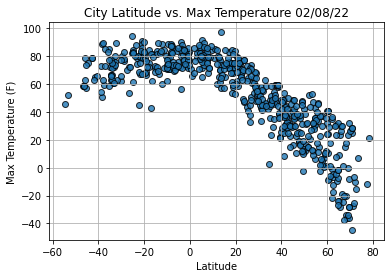

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

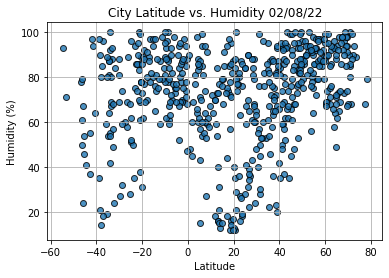

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

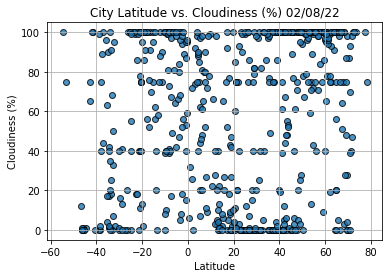

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

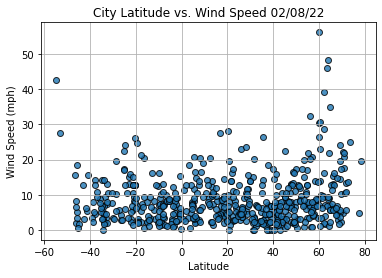

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()